## Eq. of motion


Markert et al. 2001
$$
\ddot{X} + 2D\dot{X} + X = A_0 P(t)
$$

$$
P(t) = \cos \varphi(t)
$$

$$\varphi(t) = \frac{\alpha}{2}t^2 + \eta_0 t + \beta$$


Envelope curve is $Q(t) = B_1 w(v_1(t)) + B_2 w(v_2(t)) + C_1 e^{v_1^2(t) - v_1(t)^2} + C_2 e^{v_2^2(t) - v_2(t)^2}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
def w(x):
    return wofz(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$w(X)$')

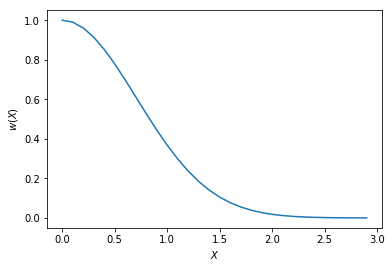

In [3]:
x = np.arange(0., 3., 0.1)
plt.plot(x, w(x), '-')
plt.xlabel('$X$')
plt.ylabel('$w(X)$')

In [42]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.00002
alpha = 1e-5
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

In [43]:
def v1(t, alph):
    prefac = -(1+1j)/(2*np.sqrt(alph))
    linear = alpha*t + eta0 + (0+1j)*lambda1
    return prefac*linear

def v2(t, alph):
    prefac = (1+1j)/(2*np.sqrt(alph))
    linear = alpha*t + eta0 + (0+1j)*lambda2
    return prefac*linear



In [44]:
def B1(alph):
    return (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alph)*A0
def B2(alph):
    return np.sign(alph)*(1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alph)*A0

def C1(alph):
    return (lambda2*ipos - ivelocity)*np.exp(-1j*beta)/(lambda2-lambda1) - B1(alph)*w(v1(0, alph))
def C2(alph):
    return (lambda1*ipos - ivelocity)*np.exp(-1j*beta)/(lambda1-lambda2) - B2(alph)*w(v2(0, alph))



In [45]:
def Q(t, alph):
    return B1(alph)*w(v1(t,alph)) + B2(alph)*w(v2(t, alph)) + C1(alph)*np.exp(v1(0, alph)**2 - v1(t, alph)**2) + C2(alph)*np.exp(v2(0, alph)**2 - v2(t, alph)**2)

In [46]:
def IF(t):
    return alpha*t + eta0

def omega(t):
    return (alpha/2.)*t + eta0

"Instantaneous frequency:"

$$
\eta \equiv \frac{\text{d}\varphi }{\text{d}t} = \alpha t + \eta_0
$$

$$
\omega \equiv \frac{\varphi }{t} = \frac{\alpha}{2}t + \eta_0
$$



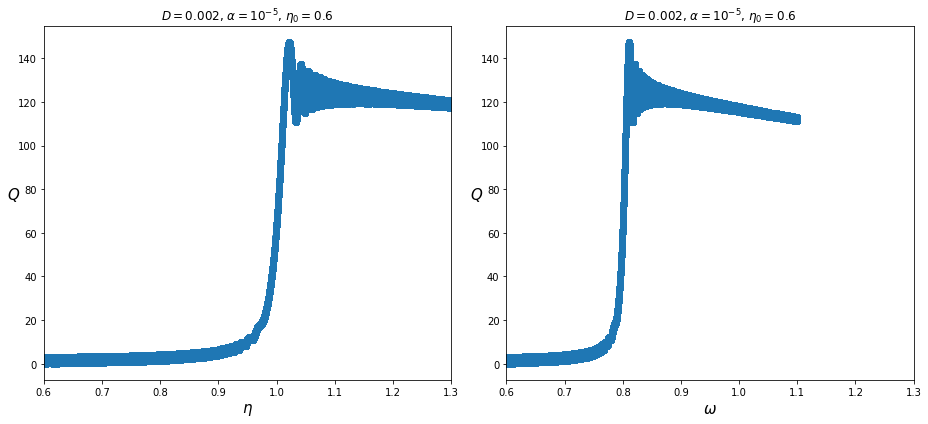

In [47]:
x = np.arange(0., 1/alpha, 0.1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
ax1.plot(IF(x), np.abs(Q(x, 1e-4)), '-o')
ax1.set_title(r"$D = 0.002$, $\alpha = 10^{-5}$, $\eta_0 = 0.6$")
ax1.set_xlabel('$\eta$', fontsize=15)
ax1.set_ylabel('$Q$', fontsize=15, rotation = 0)
ax1.set_xlim(0.6, 1.3)

ax2.plot(omega(x), np.abs(Q(x, 1e-4)), '-o')
ax2.set_title(r"$D = 0.002$, $\alpha = 10^{-5}$, $\eta_0 = 0.6$")
ax2.set_xlabel('$\omega$', fontsize=15)
ax2.set_ylabel('$Q$', fontsize=15, rotation = 0)
ax2.set_xlim(0.6, 1.3)

f.tight_layout()


In [49]:
def whereIsResonance(alph):
    x = np.arange(0., 1/alpha, 0.1)
    return IF(x[np.argmax(np.abs(Q(x, alph)))])

In [50]:
eps = np.logspace(-1, -6, 100)

In [51]:
ress = []
for e in eps:
    ress.append(whereIsResonance(e))

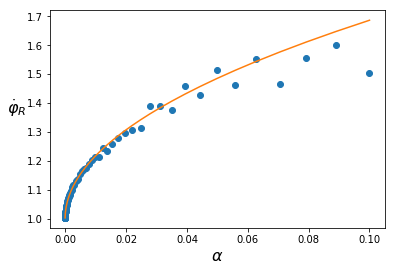

In [59]:
plt.plot(eps, ress, 'o')
plt.plot(eps, 1+np.sqrt(2*(3/4)*np.pi*eps), '-')
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\dot{\varphi}_R$', rotation = 0, labelpad = 10, fontsize= 16)
plt.savefig('alpha_res.png', bbox_inches='tight')

In [48]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.02
alpha = 1e-2
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

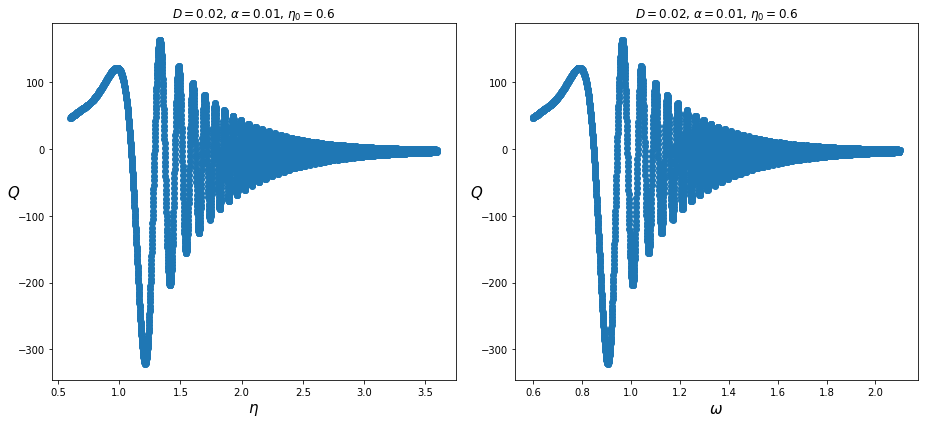

In [51]:
x = np.arange(0., 3/alpha, 0.1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
ax1.plot(IF(x), Q(x), '-o')
ax1.set_title(r"$D = 0.02$, $\alpha = 0.01$, $\eta_0 = 0.6$")
ax1.set_xlabel('$\eta$', fontsize=15)
ax1.set_ylabel('$Q$', fontsize=15, rotation = 0)

ax2.plot(omega(x), Q(x), '-o')
ax2.set_title(r"$D = 0.02$, $\alpha = 0.01$, $\eta_0 = 0.6$")
ax2.set_xlabel('$\omega$', fontsize=15)
ax2.set_ylabel('$Q$', fontsize=15, rotation = 0)

f.tight_layout()

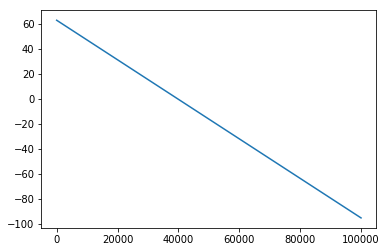

In [57]:
plt.plot(x, v1(x))